In [ ]:
pip install google-generativeai

In [ ]:
import google.generativeai as genai
from IPython.display import Markdown
import PIL.Image
import PIL.ImageDraw as ImageDraw
import PIL.Image as Image


In [ ]:
from google.colab import userdata
GEMINI_API_KEY=userdata.get("GEMINI_API_KEY")
genai.configure(api_key=GEMINI_API_KEY)

In [ ]:
# Check if API is working properly by importing the list of models

for m in genai.list_models():
    if 'generateContent' in m.supported_generation_methods:
        print(m.name)

models/gemini-1.0-pro
models/gemini-1.0-pro-001
models/gemini-1.0-pro-latest
models/gemini-1.0-pro-vision-latest
models/gemini-pro
models/gemini-pro-vision


In [ ]:
# Create an instance of the GenerativeModel class from the genai library to use gemini-pro-vision model.

model = genai.GenerativeModel('gemini-pro-vision')

/bin/bash: line 1: s: command not found
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3003  100  3003    0     0  42056      0 --:--:-- --:--:-- --:--:-- 42295


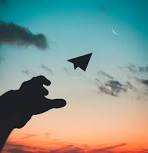

 The photo shows a hand reaching out to catch a paper plane. The sky is a gradient of blue and orange, and there are clouds in the background. The photo is taken from a low angle, and the hand is silhouetted against the sky.

The photo can be interpreted in a number of ways. It could be seen as a symbol of hope, as the paper plane is flying towards the hand. It could also be seen as a symbol of freedom, as the paper plane is flying away from the hand. The photo could also be seen as a symbol of communication, as the paper plane is carrying a message.

The photo is open to interpretation, and the viewer can decide what it means to them.

In [ ]:
# Case 1: Describe an Image

!curl -o image.jpg https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSEhL81tNK6rqvJA7cVj5vfj0r7GS3A1SSahWzy1292eg&s
img = PIL.Image.open('image.jpg')
display(img)
response = model.generate_content(img)
Markdown(response.text)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 35103  100 35103    0     0   203k      0 --:--:-- --:--:-- --:--:--  204k


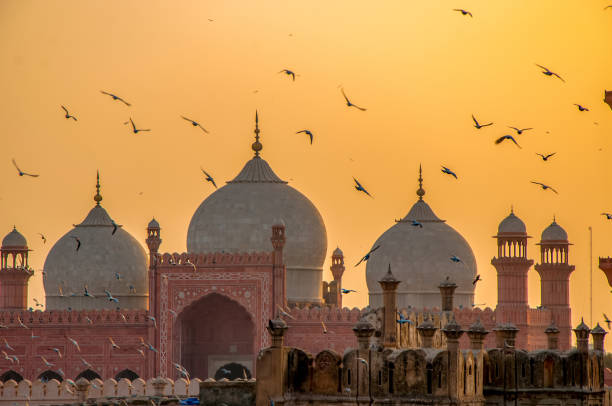

 The Badshahi Mosque is located in Lahore, Pakistan. The coordinates are 31.4152° N, 74.3580° E.

In [ ]:
# Case 2: Get location from an Image

!curl -o landscape.jpg "https://media.istockphoto.com/id/1197077400/photo/flying-birds-over-the-mosque.jpg?s=612x612&w=0&k=20&c=QAJU2FlODBGo9tlMKIdNdUdR3RqXrCXF7znQfpDVQLw="
img = PIL.Image.open('landscape.jpg')
display(img)
response = model.generate_content(["Can you provide the exact location with coordinates?", img])
Markdown(response.text)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 53494  100 53494    0     0   307k      0 --:--:-- --:--:-- --:--:--  309k


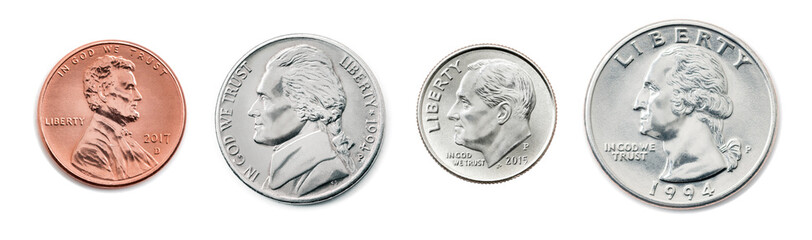

 The names of the currencies are: penny, nickel, dime, and quarter.

In [ ]:
# Case 3: Count objets in an image

!curl -o coins.jpg "https://t3.ftcdn.net/jpg/04/14/12/92/240_F_414129294_8WcnXyPPSOyx1DmgN6BaFajU0aErocjm.jpg"
img = PIL.Image.open('coins.jpg')
display(img)
response = model.generate_content(["What are the names of currencies?", img])
Markdown(response.text)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 34794  100 34794    0     0   221k      0 --:--:-- --:--:-- --:--:--  222k


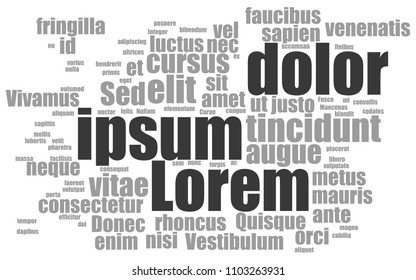

 * Dolor
* Ipsum
* Lorem
* Sit
* Amet
* Consectetur
* Adipiscing
* Elit
* Vivamus
* Neque
* Porta
* Vitae
* Lacus
* Fusce
* Metus
* Faucibus
* Sapien
* Venenatis
* Vel
* Lectus
* Nec
* Cursus
* Sed
* Id
* Fringilla
* Tellus
* In
* Hac
* Habitasse
* Platea
* Dictumst
* Aliquam
* Auctor
* Justo
* Ut
* Tincidunt
* Donec
* Rhoncus
* Quisque
* Orci
* Enim
* Nisi
* Vestibulum

In [ ]:
# Case 5: OCR

!curl -o signs.jpg "https://www.shutterstock.com/image-vector/lorem-ipsum-dolor-tag-cloud-260nw-1103263931.jpg"
img = PIL.Image.open('signs.jpg')
display(img)
response = model.generate_content(["Can you read the text for all the words?", img])
Markdown(response.text)


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 57248  100 57248    0     0   224k      0 --:--:-- --:--:-- --:--:--  223k


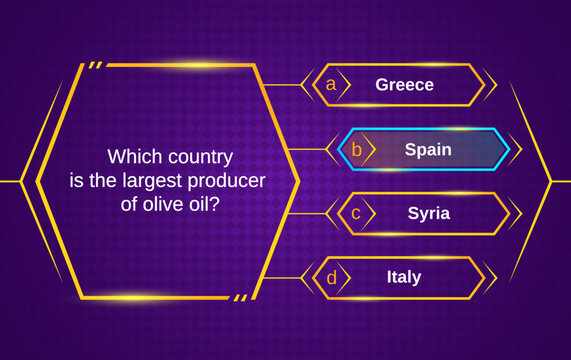

 The correct answer is Spain.

In [ ]:
# Case 6: Document OCR

!curl -o document.png "https://t4.ftcdn.net/jpg/05/34/01/61/360_F_534016128_9Ce4Ae8oWTO1BzroXUWGL7vnapzggPak.jpg"
img = PIL.Image.open('document.png')
display(img)
response = model.generate_content(["What is the correct answer for this?", img])
Markdown(response.text)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  191k  100  191k    0     0  1084k      0 --:--:-- --:--:-- --:--:-- 1082k


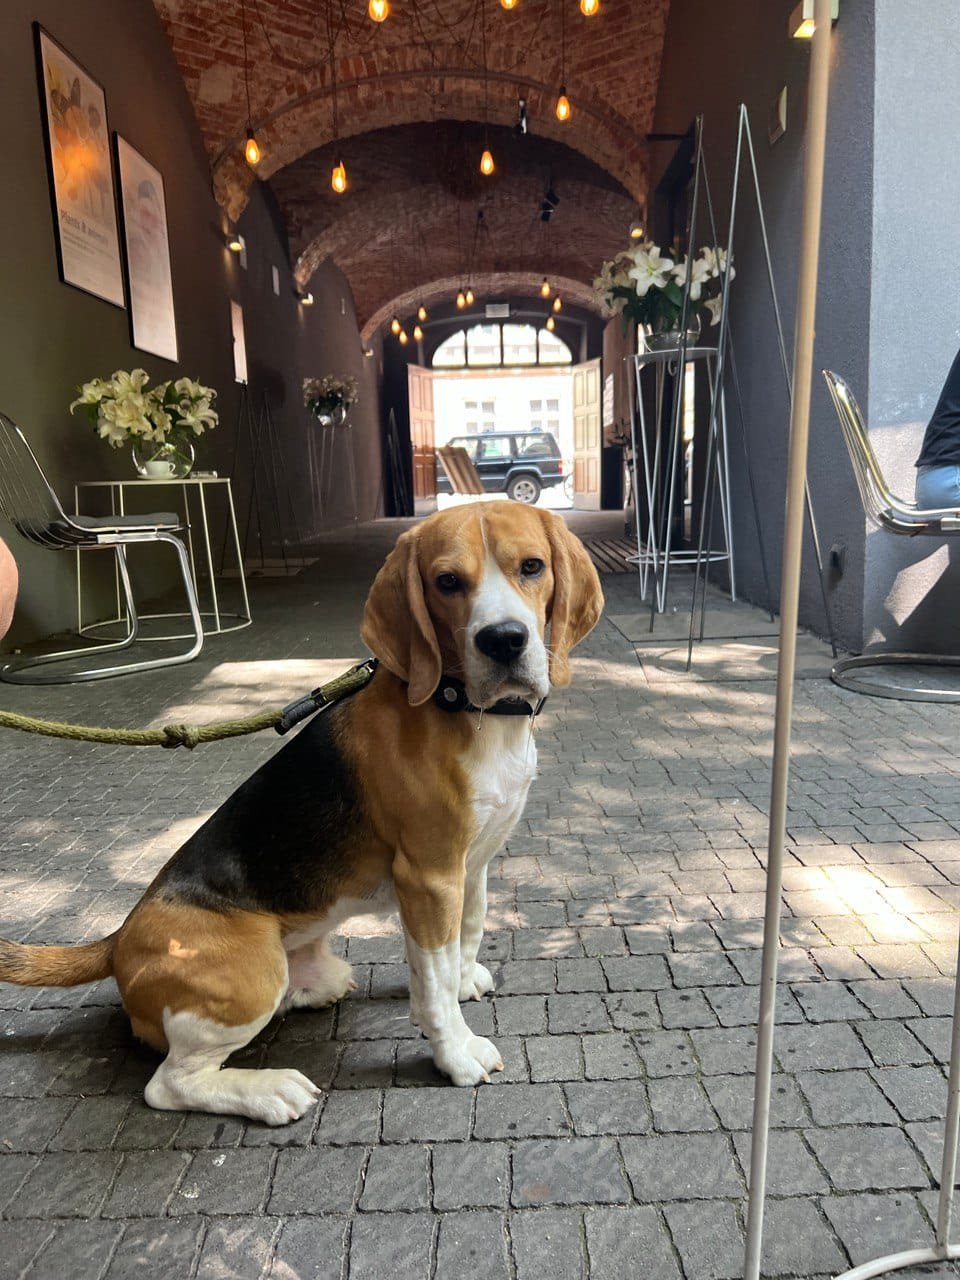

 ```
x: 47.5%
y: 56%
w: 25%
h: 33%
```

In [ ]:
# Case 7: Find an object and it's position in an image

!curl -o object.jpeg "https://blog.roboflow.com/content/images/2023/12/simple-doge.jpeg"
img = PIL.Image.open('object.jpeg')
display(img)
response = model.generate_content(["Find the x/y/w/h position of the dog, with xy as the centrepoint", img])
Markdown(response.text)



#  --- exercise: draw the bounding box on the image from these coordinates

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  157k  100  157k    0     0  2310k      0 --:--:-- --:--:-- --:--:-- 2315k


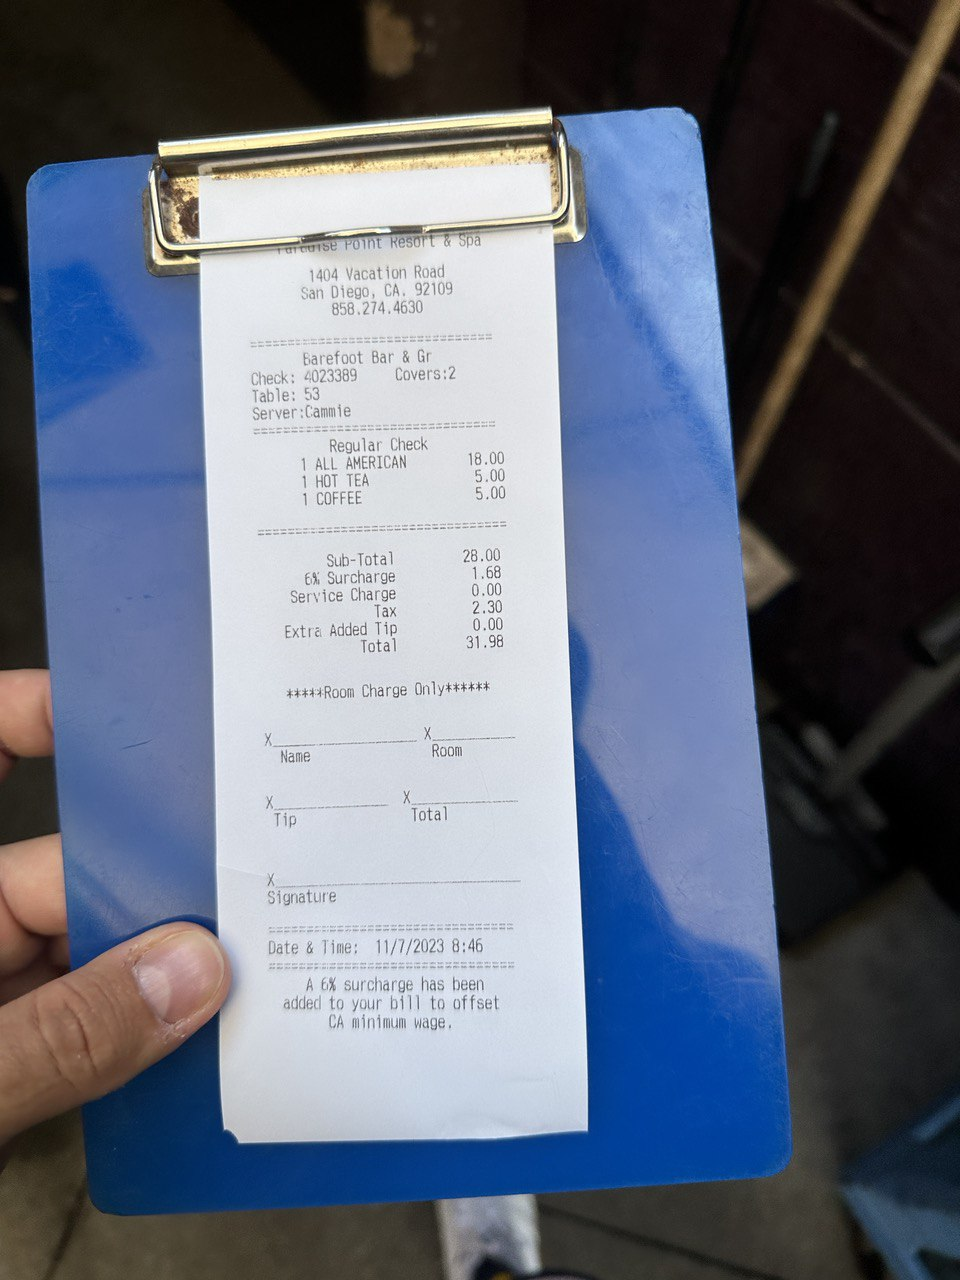

 The name of the place you visited is Paradise Point Resort and Spa.

In [ ]:
# Case 8: Do the math

!curl -o bill.jpg "https://lh7-us.googleusercontent.com/zJU3swGw1nhpII8W1vYPpTwslARFCYFH0T8_u0Zw0zX1WL9haM84CC2UOI-iCqgntvv-H5YuDSAgZ0e8Z_9ydvlYnV8iwAp0UCULq1RN3Luojap_k---UAUl7SDmsFJyh6Qp_qpszCgjxxTOOQvhYho"
img = PIL.Image.open('bill.jpg')
display(img)
response = model.generate_content(["Whats the name of place I visited?", img])
Markdown(response.text)